In [1]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import missingno as msno
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import warnings

In [3]:
df=pd.read_csv('C://Users//pc//Documents//Data_Science//ev2_bikewale.csv')

In [4]:
df

review    Used it for  \
0    We all checked the bike's capacity to be 150 k...  Daily Commute   
1    Performance is very poor on this bike. The cha...     Everything   
2    I purchased this in April 2022 and the sales s...  Daily Commute   
3    If any issues come in scooty parts not availab...  Daily Commute   
4    Don't buy this vehicle unless you have a near ...  Daily Commute   
..                                                 ...            ...   
839  Scooty is ok but 250 motor power is less. So t...  Daily Commute   
840  Superb scooty. good look, Many color options ....     Everything   
841  Up to 2 years the condition was good,\nAfter 2...  Daily Commute   
842  Compare to other scooters it is a best bike, c...  Daily Commute   
843  This bike is good as this segment. can use the...  Daily Commute   

         Owned for      Ridden for  rating  Visual Appeal  Reliability  \
0      Never owned             NaN       1            3.0          4.0   
1           > 1 yr      < 5000 kms       1            3.0          1.0   
2       < 3 months      < 5000 kms       3            4.0          4.0   
3    6 months-1 yr  5000-10000 kms       1            1.0          1.0   
4    6 months-1 yr      < 5000 kms       1            3.0          4.0   
..             ...             ...     ...            ...          ...   
839         > 1 yr      < 5000 kms       2            2.0          2.0   
840     < 3 months      < 5000 kms       5            5.0          5.0   
841         > 1 yr  5000-10000 kms       2            2.0          2.0   
842     3-6 months      < 5000 kms       5            4.0          4.0   
843     3-6 months     > 15000 kms       4            3.0          4.0   

     Performance  Service Experience  Extra Features  Comfort  \
0            NaN                 NaN             NaN      4.0   
1            NaN                 1.0             NaN      3.0   
2            NaN                 2.0             NaN      5.0   
3            NaN                 1.0             NaN      1.0   
4            NaN                 1.0             NaN      3.0   
..           ...                 ...             ...      ...   
839          NaN                 2.0             NaN      2.0   
840          5.0                 5.0             5.0      NaN   
841          4.0                 2.0             3.0      NaN   
842          NaN                 NaN             NaN      4.0   
843          NaN                 4.0             NaN      4.0   

     Maintenance cost  Value for Money     Model Name  
0                 NaN              1.0      TVS iQube  
1                 NaN              3.0      TVS iQube  
2                 NaN              2.0      TVS iQube  
3                 NaN              1.0      TVS iQube  
4                 NaN              2.0      TVS iQube  
..                ...              ...            ...  
839               NaN              3.0  Gemopai Ryder  
840               5.0              NaN  Gemopai Ryder  
841               1.0              NaN  Gemopai Ryder  
842               NaN              5.0  Gemopai Ryder  
843               NaN              4.0  Gemopai Ryder  

[844 rows x 14 columns]

In [5]:
df.head()

review    Used it for  \
0  We all checked the bike's capacity to be 150 k...  Daily Commute   
1  Performance is very poor on this bike. The cha...     Everything   
2  I purchased this in April 2022 and the sales s...  Daily Commute   
3  If any issues come in scooty parts not availab...  Daily Commute   
4  Don't buy this vehicle unless you have a near ...  Daily Commute   

       Owned for      Ridden for  rating  Visual Appeal  Reliability  \
0    Never owned             NaN       1            3.0          4.0   
1         > 1 yr      < 5000 kms       1            3.0          1.0   
2     < 3 months      < 5000 kms       3            4.0          4.0   
3  6 months-1 yr  5000-10000 kms       1            1.0          1.0   
4  6 months-1 yr      < 5000 kms       1            3.0          4.0   

   Performance  Service Experience  Extra Features  Comfort  Maintenance cost  \
0          NaN                 NaN             NaN      4.0               NaN   
1          NaN                 1.0             NaN      3.0               NaN   
2          NaN                 2.0             NaN      5.0               NaN   
3          NaN                 1.0             NaN      1.0               NaN   
4          NaN                 1.0             NaN      3.0               NaN   

   Value for Money Model Name  
0              1.0  TVS iQube  
1              3.0  TVS iQube  
2              2.0  TVS iQube  
3              1.0  TVS iQube  
4              2.0  TVS iQube

In [6]:
df.columns

Index(['review', 'Used it for', 'Owned for', 'Ridden for', 'rating',
       'Visual Appeal', 'Reliability', 'Performance', 'Service Experience',
       'Extra Features', 'Comfort', 'Maintenance cost', 'Value for Money',
       'Model Name'],
      dtype='object')

In [7]:
df.keys()

Index(['review', 'Used it for', 'Owned for', 'Ridden for', 'rating',
       'Visual Appeal', 'Reliability', 'Performance', 'Service Experience',
       'Extra Features', 'Comfort', 'Maintenance cost', 'Value for Money',
       'Model Name'],
      dtype='object')

In [8]:
df.isnull()

review  Used it for  Owned for  Ridden for  rating  Visual Appeal  \
0     False        False      False        True   False          False   
1     False        False      False       False   False          False   
2     False        False      False       False   False          False   
3     False        False      False       False   False          False   
4     False        False      False       False   False          False   
..      ...          ...        ...         ...     ...            ...   
839   False        False      False       False   False          False   
840   False        False      False       False   False          False   
841   False        False      False       False   False          False   
842   False        False      False       False   False          False   
843   False        False      False       False   False          False   

     Reliability  Performance  Service Experience  Extra Features  Comfort  \
0          False         True                True            True    False   
1          False         True               False            True    False   
2          False         True               False            True    False   
3          False         True               False            True    False   
4          False         True               False            True    False   
..           ...          ...                 ...             ...      ...   
839        False         True               False            True    False   
840        False        False               False           False     True   
841        False        False               False           False     True   
842        False         True                True            True    False   
843        False         True               False            True    False   

     Maintenance cost  Value for Money  Model Name  
0                True            False       False  
1                True            False       False  
2                True            False       False  
3                True            False       False  
4                True            False       False  
..                ...              ...         ...  
839              True            False       False  
840             False             True       False  
841             False             True       False  
842              True            False       False  
843              True            False       False  

[844 rows x 14 columns]

In [9]:
df.isnull().sum().sort_values()

Used it for             0
Owned for               0
rating                  0
Model Name              0
review                 47
Visual Appeal         105
Reliability           128
Service Experience    141
Ridden for            176
Comfort               314
Value for Money       454
Performance           499
Extra Features        659
Maintenance cost      664
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844 entries, 0 to 843
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   review              797 non-null    object 
 1   Used it for         844 non-null    object 
 2   Owned for           844 non-null    object 
 3   Ridden for          668 non-null    object 
 4   rating              844 non-null    int64  
 5   Visual Appeal       739 non-null    float64
 6   Reliability         716 non-null    float64
 7   Performance         345 non-null    float64
 8   Service Experience  703 non-null    float64
 9   Extra Features      185 non-null    float64
 10  Comfort             530 non-null    float64
 11  Maintenance cost    180 non-null    float64
 12  Value for Money     390 non-null    float64
 13  Model Name          844 non-null    object 
dtypes: float64(8), int64(1), object(5)
memory usage: 92.4+ KB


In [11]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the sentiment analyzer
sentiments = SentimentIntensityAnalyzer()

# Define a function to get the sentiment label
def get_sentiment_label(review_text):
    if pd.isna(review_text):
        return 'neutral'
    sentiment_scores = sentiments.polarity_scores(review_text)
    pos = sentiment_scores['pos']
    neg = sentiment_scores['neg']
    if pos > neg:
        return 'positive'
    elif pos < neg:
        return 'negative'
    else:
        return 'neutral'

# Apply the function to each review and create a new column
df['sentiment'] = df['review'].apply(get_sentiment_label)


In [12]:
df

review    Used it for  \
0    We all checked the bike's capacity to be 150 k...  Daily Commute   
1    Performance is very poor on this bike. The cha...     Everything   
2    I purchased this in April 2022 and the sales s...  Daily Commute   
3    If any issues come in scooty parts not availab...  Daily Commute   
4    Don't buy this vehicle unless you have a near ...  Daily Commute   
..                                                 ...            ...   
839  Scooty is ok but 250 motor power is less. So t...  Daily Commute   
840  Superb scooty. good look, Many color options ....     Everything   
841  Up to 2 years the condition was good,\nAfter 2...  Daily Commute   
842  Compare to other scooters it is a best bike, c...  Daily Commute   
843  This bike is good as this segment. can use the...  Daily Commute   

         Owned for      Ridden for  rating  Visual Appeal  Reliability  \
0      Never owned             NaN       1            3.0          4.0   
1           > 1 yr      < 5000 kms       1            3.0          1.0   
2       < 3 months      < 5000 kms       3            4.0          4.0   
3    6 months-1 yr  5000-10000 kms       1            1.0          1.0   
4    6 months-1 yr      < 5000 kms       1            3.0          4.0   
..             ...             ...     ...            ...          ...   
839         > 1 yr      < 5000 kms       2            2.0          2.0   
840     < 3 months      < 5000 kms       5            5.0          5.0   
841         > 1 yr  5000-10000 kms       2            2.0          2.0   
842     3-6 months      < 5000 kms       5            4.0          4.0   
843     3-6 months     > 15000 kms       4            3.0          4.0   

     Performance  Service Experience  Extra Features  Comfort  \
0            NaN                 NaN             NaN      4.0   
1            NaN                 1.0             NaN      3.0   
2            NaN                 2.0             NaN      5.0   
3            NaN                 1.0             NaN      1.0   
4            NaN                 1.0             NaN      3.0   
..           ...                 ...             ...      ...   
839          NaN                 2.0             NaN      2.0   
840          5.0                 5.0             5.0      NaN   
841          4.0                 2.0             3.0      NaN   
842          NaN                 NaN             NaN      4.0   
843          NaN                 4.0             NaN      4.0   

     Maintenance cost  Value for Money     Model Name sentiment  
0                 NaN              1.0      TVS iQube  negative  
1                 NaN              3.0      TVS iQube  negative  
2                 NaN              2.0      TVS iQube  positive  
3                 NaN              1.0      TVS iQube  negative  
4                 NaN              2.0      TVS iQube  negative  
..                ...              ...            ...       ...  
839               NaN              3.0  Gemopai Ryder  positive  
840               5.0              NaN  Gemopai Ryder  positive  
841               1.0              NaN  Gemopai Ryder  negative  
842               NaN              5.0  Gemopai Ryder  positive  
843               NaN              4.0  Gemopai Ryder  positive  

[844 rows x 15 columns]

In [13]:
df['sentiment'].value_counts()

positive    527
negative    264
neutral      53
Name: sentiment, dtype: int64

In [14]:

df_segment = df.iloc[:, 5:13].copy()

In [15]:
df_segment = df_segment.fillna(0.)

In [16]:
df_segment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844 entries, 0 to 843
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Visual Appeal       844 non-null    float64
 1   Reliability         844 non-null    float64
 2   Performance         844 non-null    float64
 3   Service Experience  844 non-null    float64
 4   Extra Features      844 non-null    float64
 5   Comfort             844 non-null    float64
 6   Maintenance cost    844 non-null    float64
 7   Value for Money     844 non-null    float64
dtypes: float64(8)
memory usage: 52.9 KB


In [17]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_segment)

In [18]:
pca = PCA(random_state = 42)
pca.fit(df_scaled)

PCA(random_state=42)

In [56]:
df_pca = pca.transform(df_scaled)
df_pca

array([[ 0.29122665, -1.03805467,  0.35486395, ..., -0.16928653,
        -0.43801203,  0.95782684],
       [ 0.71080145, -1.39440508, -0.36046619, ..., -0.08605299,
        -0.42627866, -0.14991662],
       [-0.84914938, -1.18976544,  0.16768345, ..., -0.19190393,
        -0.32999273,  0.83073814],
       ...,
       [ 1.22821815,  1.97981462,  0.21503315, ...,  0.94790135,
        -0.65819133, -0.42143437],
       [-0.60674056, -1.68414747, -0.75218549, ..., -0.0902134 ,
        -0.75511627, -0.25471633],
       [-1.20385996, -1.36036388, -0.61627373, ..., -0.04431898,
        -0.17913074, -0.07305525]])

In [20]:
df_pca1 = pd.DataFrame(df_pca, columns = [f'PC{x +1}' for x in range(len(df_segment.columns))])

In [21]:
df_pca1.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.291227 -1.038055  0.354864 -0.623469 -1.102720 -0.169287 -0.438012   
1  0.710801 -1.394405 -0.360466 -0.621671  0.320899 -0.086053 -0.426279   
2 -0.849149 -1.189765  0.167683 -0.410898 -0.409054 -0.191904 -0.329993   
3  1.967022 -0.878935 -0.100197  0.330003 -0.075822  0.069599  0.013068   
4  0.078940 -1.017161 -0.079210 -0.324132 -0.961554  0.005517 -0.107260   

        PC8  
0  0.957827  
1 -0.149917  
2  0.830738  
3  0.011328  
4  0.427972

In [22]:
pca_summary = pd.DataFrame({'Standard Deviation':df_pca1.std(),
                           'Proportion of Variance': pca.explained_variance_ratio_,
                           'Cumultive Proportion': pca.explained_variance_ratio_.cumsum()})

In [23]:
pca_summary

Standard Deviation  Proportion of Variance  Cumultive Proportion
PC1            1.845017                0.425007              0.425007
PC2            1.736646                0.376546              0.801553
PC3            0.903486                0.101915              0.903468
PC4            0.517750                0.033468              0.936936
PC5            0.405239                0.020503              0.957439
PC6            0.379558                0.017987              0.975426
PC7            0.337883                0.014254              0.989680
PC8            0.287510                0.010320              1.000000

In [24]:
factor_loadings = pd.DataFrame(pca.components_, columns = df_segment.columns, index = df_pca1.columns).T

In [25]:
factor_loadings.style.background_gradient(cmap = 'Blues')

Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'], dtype='object')


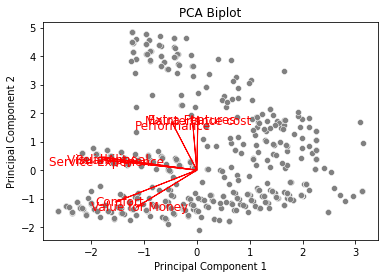

In [27]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
# Calculate centroid
index_names = factor_loadings.index
# Assuming df_pca1 is your DataFrame with the PCA results
# and it contains the columns 'PC1' and 'PC2'

# Check if df_pca1 contains the columns 'PC1' and 'PC2'
print(df_pca1.columns)

# Plot data points
sns.scatterplot(data=df_pca1, x='PC1', y='PC2', color='grey')

# Plot arrows from centroid to provided coordinates with index names
#for i in range(len(factor_loadings['PC1'])):
    #plt.arrow(0, 0, factor_loadings['PC1'][i], factor_loadings['PC2'][i], 
             # color='r', alpha=0.5)
  #  plt.text(factor_loadings['PC1'][i]*3.5, factor_loadings['PC2'][i]*3.5, 
             #index_names[i], color='g', ha='center', va='center')
for i in range(len(factor_loadings['PC1'])):
    plt.arrow(0, 0, factor_loadings['PC1'][i] * 3.5, factor_loadings['PC2'][i] * 3.5, head_width=0.05, head_length=0.1, fc='red', ec='red')
    plt.text((factor_loadings['PC1'][i] * 3.5), factor_loadings['PC2'][i]* 3.5, index_names[i], fontsize=12, ha='center', color = 'red', va = 'center_baseline')


plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Biplot')
plt.show()


In [28]:
df_km = [KMeans(n_clusters = k, random_state = 42).fit(df_scaled) for k in range(2, 9)]

In [30]:
wcss = [model.inertia_ for model in df_km]

fig = plt.figure(figsize = (6,4))
sns.barplot(x = list(range(2, 9)), y = wcss, color = 'grey')
plt.xlabel("Segments")
plt.ylabel('Sum of Within Cluster Distances')
plt.title("Scree plot for the EV 2-Wheeler data set")
plt.savefig("scree_plot.png")
plt.show()

In [32]:
wcss_diff = pd.DataFrame({'Segments':range(2,9),
                          'WCSS Difference': pd.Series(wcss).diff()})
wcss_diff['WCSS Difference'][0] = 0

C:\Users\pc\AppData\Local\Temp\ipykernel_2656\3704507040.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wcss_diff['WCSS Difference'][0] = 0


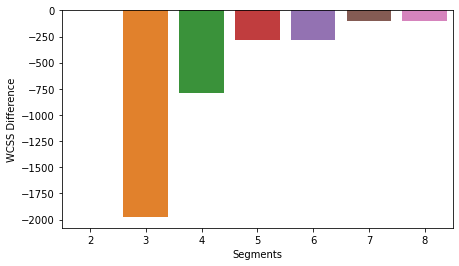

In [34]:
plt.figure(figsize=(7, 4))
sns.barplot(data=wcss_diff, x='Segments', y='WCSS Difference')
plt.savefig("wcss_diff.png")
plt.show()


In [36]:
kmeans = df_km[2]

In [37]:
data_clust = pd.DataFrame(df_scaled, columns = df_segment.columns)
data_clust['cluster'] = kmeans.labels_

In [38]:
data_pca = df_pca1.copy()
data_pca['cluster'] = kmeans.labels_

Profiles of Clusters


In [66]:
data_profile = df_segment.copy()
data_profile['cluster'] = kmeans.labels_
data_profile['cluster']

0      1
1      1
2      2
3      1
4      2
      ..
839    1
840    3
841    1
842    2
843    2
Name: cluster, Length: 844, dtype: int32

In [40]:
columns_segment = data_clust.columns
data_pivot = data_profile[columns_segment].groupby('cluster').mean().T

In [45]:
data_pivot_mean = data_pivot.mean(axis = 1).reset_index()
data_pivot_mean.columns = ['Variable', 'Value']
data_pivot_mean

Variable     Value
0       Visual Appeal  3.730668
1         Reliability  3.280691
2         Performance  2.319184
3  Service Experience  3.040141
4      Extra Features  1.063785
5             Comfort  2.277992
6    Maintenance cost  1.155303
7     Value for Money  1.164487

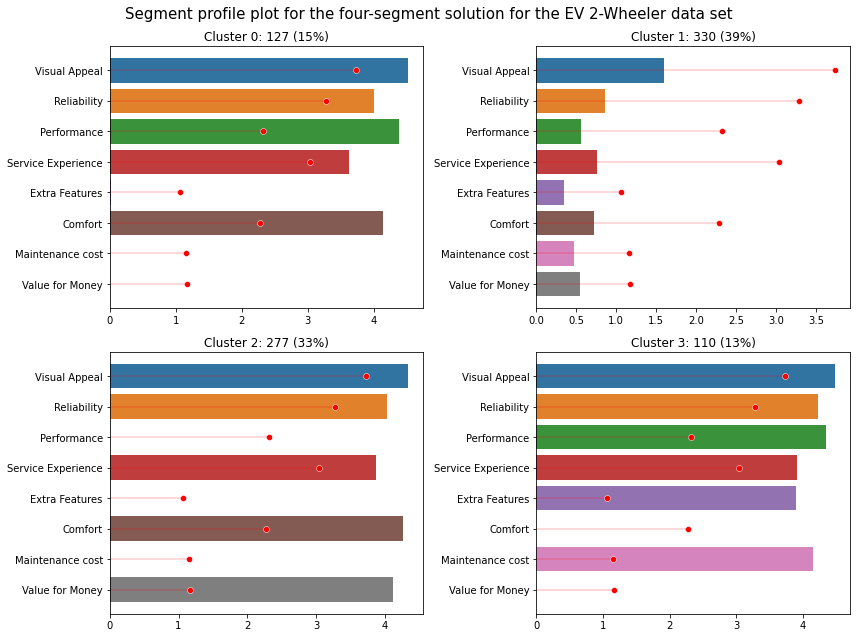

In [51]:
plt.figure(figsize = (12, 9))
for i in range(4):
    plt.subplot(2, 2, i+1)
    sns.barplot(data=data_pivot, x = i, y = data_pivot.index)
    sns.scatterplot(data=data_pivot_mean, x = 'Value', y = 'Variable', color = 'red')
    for index, row in data_pivot_mean.iterrows():
        plt.hlines(y=row['Variable'], xmin=0, xmax=row['Value'], colors='red', alpha = 0.2)
    plt.ylabel("")
    plt.xlabel("")
    plt.title(f"Cluster {i}: {data_profile['cluster'].value_counts()[i]} ({data_profile['cluster'].value_counts()[i]*100/len(data_profile):.0f}%)")
plt.suptitle("Segment profile plot for the four-segment solution for the EV 2-Wheeler data set", fontsize = 15)
plt.tight_layout()
plt.savefig("segment_profile.png")
plt.show()